1) Buscar valores faltantes y outliers en las tablas de ventas, compras y gastos. Al encontrarlos, mostrar una gráfica que permita analizar la calidad del dato, por último deberás corregirlos o desestimarlos. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [11]:
from IPython.display import clear_output

In [12]:
df_venta = pd.read_csv("Datasets/Venta.csv", sep=",")

In [13]:
df_venta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46645 entries, 0 to 46644
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdVenta        46645 non-null  int64  
 1   Fecha          46645 non-null  object 
 2   Fecha_Entrega  46645 non-null  object 
 3   IdCanal        46645 non-null  int64  
 4   IdCliente      46645 non-null  int64  
 5   IdSucursal     46645 non-null  int64  
 6   IdEmpleado     46645 non-null  int64  
 7   IdProducto     46645 non-null  int64  
 8   Precio         45721 non-null  float64
 9   Cantidad       45753 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 3.6+ MB


In [14]:
def evaluacion_calidad_outliers(dato, desde, hasta):
    calidad = 'Sin errores'
    if (str(dato) == 'nan'):
        calidad = 'Valor Nulo'
        return calidad
    if ((dato < desde) or (dato > hasta)):
        calidad = 'Outlier'
        return calidad
    return calidad

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


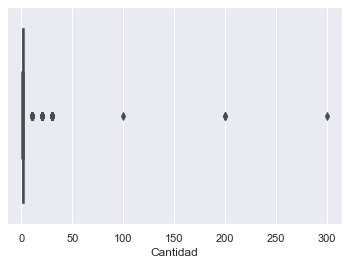

In [15]:
sns.boxplot(df_venta.Cantidad)
plt.show()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


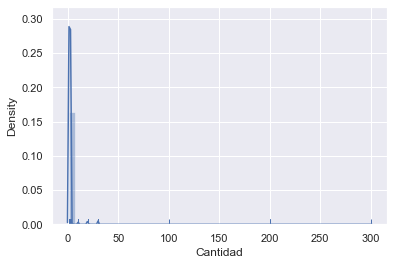

In [16]:
sns.distplot(df_venta.Cantidad, hist=True, kde=True, rug=True)
plt.show()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


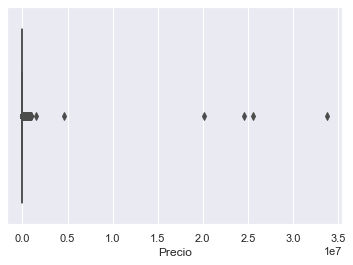

In [17]:
sns.boxplot(df_venta.Precio)
plt.show()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


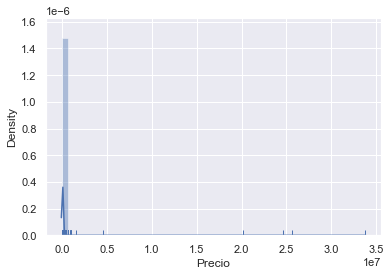

In [18]:
sns.distplot(df_venta.Precio, hist=True, kde=True, rug=True)
plt.show()

Se buscan los Outliers pero agrupando por IdProducto

In [19]:
lista_id_producto = []
lista_min_precio = []
lista_max_precio = []
lista_min_cantidad = []
lista_max_cantidad = []
i_max = len(df_venta.IdProducto.unique())
i = 0
for id_producto in df_venta.IdProducto.unique():
    i = i + 1
    q1 = df_venta[df_venta['IdProducto'] == id_producto].Precio.quantile(0.25)
    mediana = df_venta[df_venta['IdProducto'] == id_producto].Precio.quantile(0.5)
    #mediana = df_venta[df_venta['IdProducto'] == id_producto].Precio.median()
    q3 = df_venta[df_venta['IdProducto'] == id_producto].Precio.quantile(0.75)
    iqr = q3 - q1
    min_precio = mediana - 1.5 * iqr
    max_precio = mediana + 1.5 * iqr    
    if (min_precio < 0.001):
        min_precio = 0.001
    
    q1 = df_venta[df_venta['IdProducto'] == id_producto].Cantidad.quantile(0.25)
    mediana = df_venta[df_venta['IdProducto'] == id_producto].Cantidad.quantile(0.5)
    #mediana = df_venta[df_venta['IdProducto'] == id_producto].Cantidad.median()
    q3 = df_venta[df_venta['IdProducto'] == id_producto].Cantidad.quantile(0.75)
    iqr = q3 - q1
    min_cantidad = mediana - 1.5 * iqr
    max_cantidad = mediana + 1.5 * iqr  
    if (min_cantidad < 0):
        min_cantidad = 0
    
    lista_id_producto.append(id_producto)
    lista_min_precio.append(min_precio)
    lista_max_precio.append(max_precio)
    lista_min_cantidad.append(min_cantidad)
    lista_max_cantidad.append(max_cantidad)
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

Completado: 100.0%


In [20]:
lst = list(zip(lista_id_producto, lista_min_precio, lista_max_precio, lista_min_cantidad, lista_max_cantidad))
df_venta_outliers = pd.DataFrame(lst , columns = ['IdProducto','MinPrecio','MaxPrecio','MinCantidad', 'MaxCantidad'])

In [21]:
df_venta = pd.merge(df_venta, df_venta_outliers, on='IdProducto', how='left')

In [22]:
df_venta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46645 entries, 0 to 46644
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdVenta        46645 non-null  int64  
 1   Fecha          46645 non-null  object 
 2   Fecha_Entrega  46645 non-null  object 
 3   IdCanal        46645 non-null  int64  
 4   IdCliente      46645 non-null  int64  
 5   IdSucursal     46645 non-null  int64  
 6   IdEmpleado     46645 non-null  int64  
 7   IdProducto     46645 non-null  int64  
 8   Precio         45721 non-null  float64
 9   Cantidad       45753 non-null  float64
 10  MinPrecio      46645 non-null  float64
 11  MaxPrecio      46645 non-null  float64
 12  MinCantidad    46645 non-null  float64
 13  MaxCantidad    46645 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 5.3+ MB


In [23]:
df_venta['Calidad_Precio'] = df_venta.apply(lambda row: evaluacion_calidad_outliers(row['Precio'], row['MinPrecio'], row['MaxPrecio']), axis=1)

In [24]:
df_venta['Calidad_Cantidad'] = df_venta.apply(lambda row: evaluacion_calidad_outliers(row['Cantidad'], row['MinCantidad'], row['MaxCantidad']), axis=1)

In [25]:
def ploteo_Calidad(df, columna, ubicacion):
    """
    Esta función recibe de parámetros un objeto dataframe y el nombre de la columna por la cuál se va a realizar el gráfico
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    test_per = df.groupby(columna).agg(Porcentage =(columna, lambda p: p.count() / df[columna].count() * 100)).round(2)
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=test_per.index, y='Porcentage', data=test_per, ci=None, palette="muted",orient='v', )
    ax.set_title(columna, fontsize=15)
    ax.set_xlabel ("Estado")
    ax.set_ylabel ("Porcentage")
    # calculate the percentages and annotate the sns barplot
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
    #bar.savefig(ubicacion + '\\' + columna + ".png");
    plt.show()

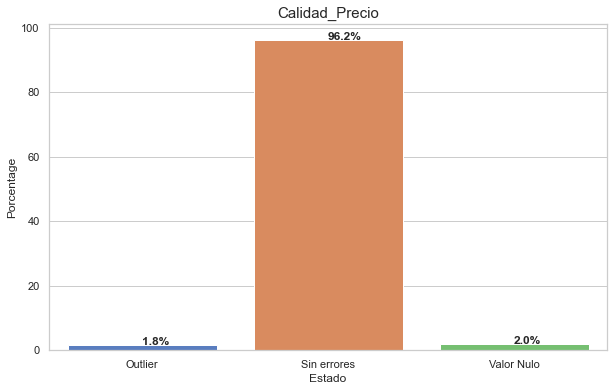

In [26]:
ploteo_Calidad(df_venta, 'Calidad_Precio', '')

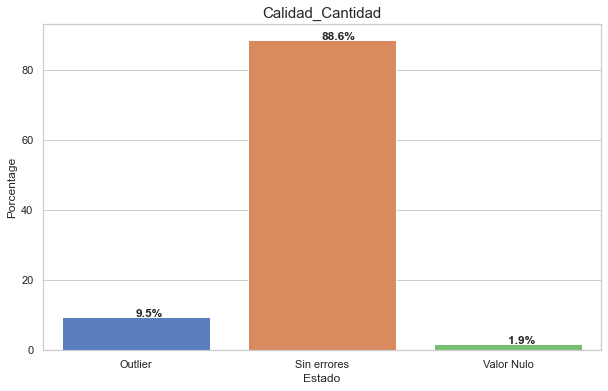

In [27]:
ploteo_Calidad(df_venta, 'Calidad_Cantidad', '')

In [29]:
df_compra = pd.read_csv("Datasets/Compra.csv", sep=",")

In [30]:
df_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdCompra       11539 non-null  int64  
 1   Fecha          11539 non-null  object 
 2   Fecha_Año      11539 non-null  int64  
 3   Fecha_Mes      11539 non-null  int64  
 4   Fecha_Periodo  11539 non-null  int64  
 5   IdProducto     11539 non-null  int64  
 6   Cantidad       11539 non-null  int64  
 7   Precio         11172 non-null  float64
 8   IdProveedor    11539 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 811.5+ KB


C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


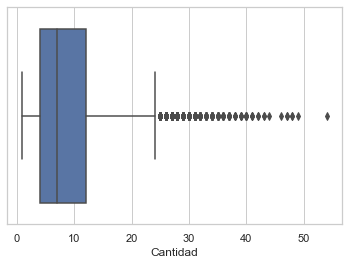

In [31]:
sns.boxplot(df_compra.Cantidad)
plt.show()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


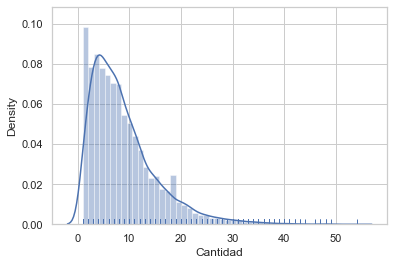

In [32]:
sns.distplot(df_compra.Cantidad, hist=True, kde=True, rug=True)
plt.show()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


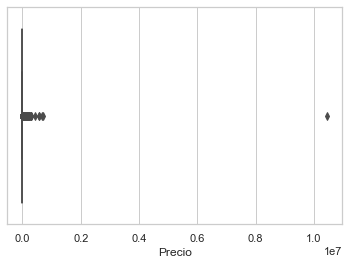

In [33]:
sns.boxplot(df_compra.Precio)
plt.show()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


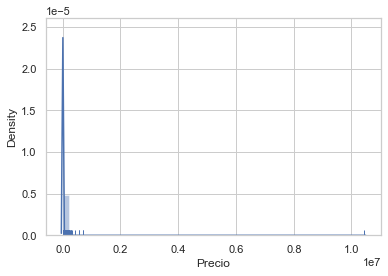

In [34]:
sns.distplot(df_compra.Precio, hist=True, kde=True, rug=True)
plt.show()

In [35]:
lista_id_producto = []
lista_min_precio = []
lista_max_precio = []
lista_min_cantidad = []
lista_max_cantidad = []
i_max = len(df_compra.IdProducto.unique())
i = 0
for id_producto in df_compra.IdProducto.unique():
    i = i + 1
    q1 = df_compra[df_compra['IdProducto'] == id_producto].Precio.quantile(0.25)
    mediana = df_compra[df_compra['IdProducto'] == id_producto].Precio.quantile(0.5)
    #mediana = df_compra[df_compra['IdProducto'] == id_producto].Precio.median()
    q3 = df_compra[df_compra['IdProducto'] == id_producto].Precio.quantile(0.75)
    iqr = q3 - q1
    min_precio = mediana - 1.5 * iqr
    max_precio = mediana + 1.5 * iqr    
    if (min_precio < 0.001):
        min_precio = 0.001
    
    q1 = df_compra[df_compra['IdProducto'] == id_producto].Cantidad.quantile(0.25)
    mediana = df_compra[df_compra['IdProducto'] == id_producto].Cantidad.quantile(0.5)
    #mediana = df_compra[df_compra['IdProducto'] == id_producto].Cantidad.median()
    q3 = df_compra[df_compra['IdProducto'] == id_producto].Cantidad.quantile(0.75)
    iqr = q3 - q1
    min_cantidad = mediana - 1.5 * iqr
    max_cantidad = mediana + 1.5 * iqr  
    if (min_cantidad < 0):
        min_cantidad = 0
    
    lista_id_producto.append(id_producto)
    lista_min_precio.append(min_precio)
    lista_max_precio.append(max_precio)
    lista_min_cantidad.append(min_cantidad)
    lista_max_cantidad.append(max_cantidad)
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

Completado: 100.0%


In [36]:
lst = list(zip(lista_id_producto, lista_min_precio, lista_max_precio, lista_min_cantidad, lista_max_cantidad))
df_compra_outliers = pd.DataFrame(lst , columns = ['IdProducto','MinPrecio','MaxPrecio','MinCantidad', 'MaxCantidad'])

In [37]:
df_compra = pd.merge(df_compra, df_compra_outliers, on='IdProducto', how='left')

In [38]:
df_compra['Calidad_Precio'] = df_compra.apply(lambda row: evaluacion_calidad_outliers(row['Precio'], row['MinPrecio'], row['MaxPrecio']), axis=1)

In [39]:
df_compra['Calidad_Cantidad'] = df_compra.apply(lambda row: evaluacion_calidad_outliers(row['Cantidad'], row['MinCantidad'], row['MaxCantidad']), axis=1)

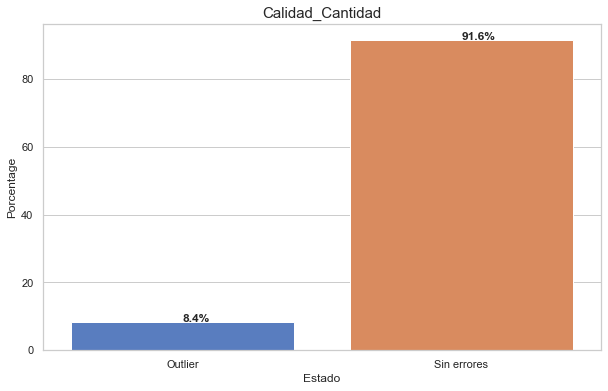

In [40]:
ploteo_Calidad(df_compra, 'Calidad_Cantidad', '')

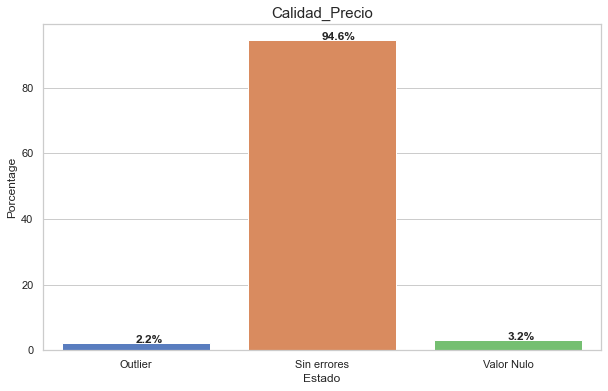

In [41]:
ploteo_Calidad(df_compra, 'Calidad_Precio', '')

In [44]:
df_gasto = pd.read_csv("Datasets/Gasto.csv", sep=",")

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


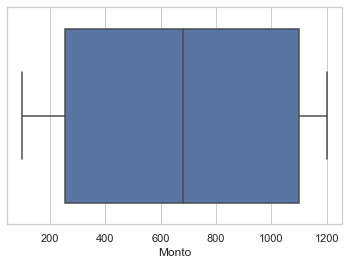

In [45]:
sns.boxplot(df_gasto.Monto)
plt.show()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


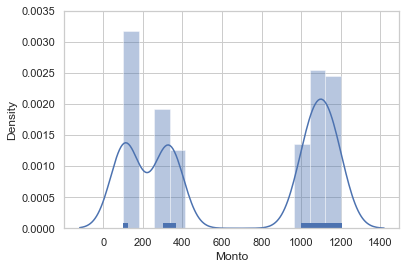

In [46]:
sns.distplot(df_gasto.Monto, hist=True, kde=True, rug=True)
plt.show()

In [47]:
lista_id_tipo_gasto = []
lista_min_monto = []
lista_max_monto = []
i_max = len(df_gasto.IdTipoGasto.unique())
i = 0
for id_tipo_gasto in df_gasto.IdTipoGasto.unique():
    i = i + 1
    q1 = df_gasto[df_gasto['IdTipoGasto'] == id_tipo_gasto].Monto.quantile(0.25)
    mediana = df_gasto[df_gasto['IdTipoGasto'] == id_tipo_gasto].Monto.quantile(0.5)
    #mediana = df_gasto[df_gasto['IdTipoGasto'] == id_tipo_gasto].Monto.median()
    q3 = df_gasto[df_gasto['IdTipoGasto'] == id_tipo_gasto].Monto.quantile(0.75)
    iqr = q3 - q1
    min_monto = mediana - 1.5 * iqr
    max_monto = mediana + 1.5 * iqr    
    if (min_monto < 0.001):
        min_monto = 0.001
    
    lista_id_tipo_gasto.append(id_tipo_gasto)
    lista_min_monto.append(min_monto)
    lista_max_monto.append(max_monto)
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

Completado: 100.0%


In [48]:
lst = list(zip(lista_id_tipo_gasto, lista_min_monto, lista_max_monto))
df_gasto_outliers = pd.DataFrame(lst , columns = ['IdTipoGasto','MinMonto','MaxMonto'])

In [49]:
df_gasto = pd.merge(df_gasto, df_gasto_outliers, on='IdTipoGasto', how='left')

In [50]:
df_gasto['Calidad_Monto'] = df_gasto.apply(lambda row: evaluacion_calidad_outliers(row['Monto'], row['MinMonto'], row['MaxMonto']), axis=1)

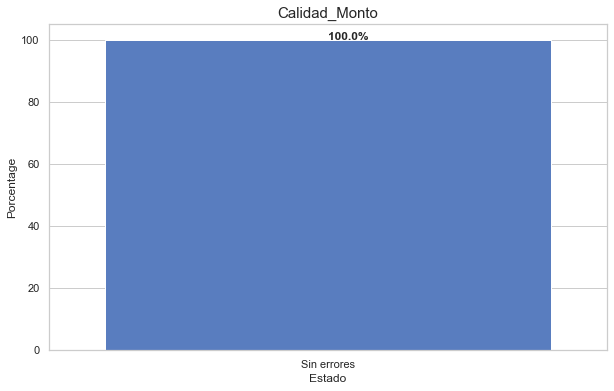

In [51]:
ploteo_Calidad(df_gasto, 'Calidad_Monto', '')

2- Es necesario generar una gráfica representativa de la evolución de las ventas y las compras a lo largo del tiempo.

In [52]:
df_venta['Venta'] = df_venta['Precio'] * df_venta['Cantidad']
df_compra['Compra'] = df_compra['Precio'] * df_compra['Cantidad']

<h1> Titulo </h1>

In [53]:
df_venta_fecha = df_venta[(df_venta['Calidad_Precio'] == 'Sin errores') & (df_venta['Calidad_Cantidad'] == 'Sin errores')].groupby(["Fecha"])["Venta"].sum()
df_compra_fecha = df_compra[(df_compra['Calidad_Precio'] == 'Sin errores') & (df_compra['Calidad_Cantidad'] == 'Sin errores')].groupby(["Fecha"])["Compra"].sum()

In [54]:
df_venta_fecha = pd.DataFrame(df_venta_fecha)
df_compra_fecha = pd.DataFrame(df_compra_fecha)

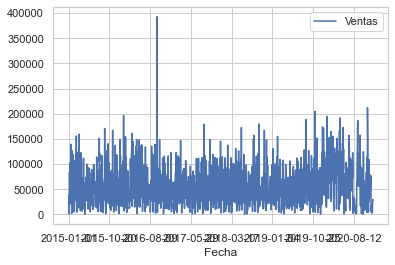

In [55]:
df_venta_fecha['Venta'].plot(legend=True)
#df_compra_fecha['Compra'].plot(legend=True)
#plt.legend(['Ventas', 'Compras'])
plt.legend(['Ventas'])
plt.show()

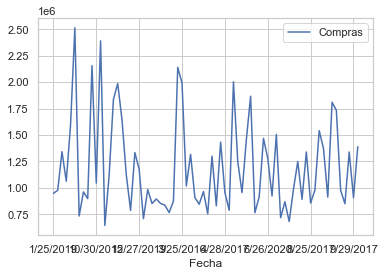

In [56]:
df_compra_fecha['Compra'].plot(legend=True)
plt.legend(['Compras'])
plt.show()

In [57]:
df_venta['Fecha']=pd.to_datetime(df_venta['Fecha'], format='%Y-%m-%d')
df_venta['Fecha_Entrega']=pd.to_datetime(df_venta['Fecha_Entrega'], format='%Y-%m-%d')

In [58]:
df_venta['Fecha_Año'] = pd.DatetimeIndex(df_venta['Fecha']).year
df_venta['Fecha_Mes'] = pd.DatetimeIndex(df_venta['Fecha']).month
df_venta['Fecha_Periodo'] = df_venta['Fecha_Año'] * 100 + df_venta['Fecha_Mes']

In [59]:
df_compra['Fecha']=pd.to_datetime(df_compra['Fecha'], format='%m/%d/%Y')
df_gasto['Fecha']=pd.to_datetime(df_gasto['Fecha'], format='%Y-%m-%d')

In [60]:
df_compra['Fecha_Año'] = pd.DatetimeIndex(df_compra['Fecha']).year
df_compra['Fecha_Mes'] = pd.DatetimeIndex(df_compra['Fecha']).month
df_compra['Fecha_Periodo'] = df_compra['Fecha_Año'] * 100 + df_compra['Fecha_Mes']

In [61]:
df_gasto['Fecha_Año'] = pd.DatetimeIndex(df_gasto['Fecha']).year
df_gasto['Fecha_Mes'] = pd.DatetimeIndex(df_gasto['Fecha']).month
df_gasto['Fecha_Periodo'] = df_gasto['Fecha_Año'] * 100 + df_gasto['Fecha_Mes']

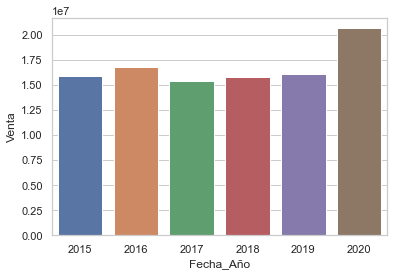

In [62]:
sns.barplot(data = df_venta[(df_venta['Calidad_Precio'] == 'Sin errores') & (df_venta['Calidad_Cantidad'] == 'Sin errores')], x = "Fecha_Año", y = "Venta", estimator=sum, ci=None)
plt.show()

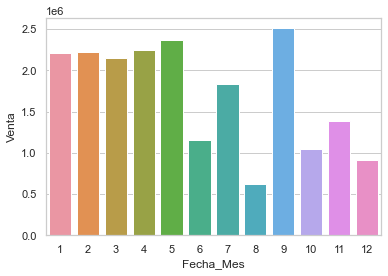

In [63]:
sns.barplot(data = df_venta[(df_venta['Calidad_Precio'] == 'Sin errores') & (df_venta['Calidad_Cantidad'] == 'Sin errores') & (df_venta['Fecha_Año'] == 2020)], x = "Fecha_Mes", y = "Venta", estimator=sum, ci=None)
plt.show()

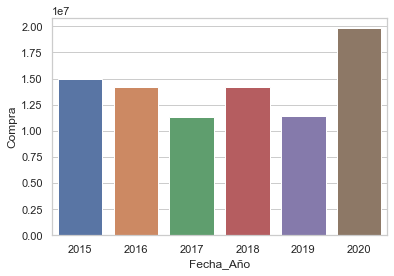

In [64]:
sns.barplot(data = df_compra[(df_compra['Calidad_Precio'] == 'Sin errores') & (df_compra['Calidad_Cantidad'] == 'Sin errores')], x = "Fecha_Año", y = "Compra", estimator=sum, ci=None)
plt.show()

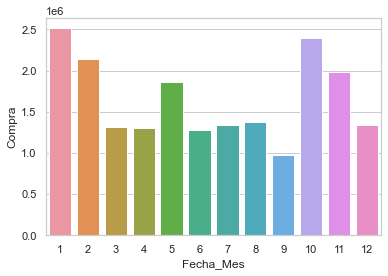

In [65]:
sns.barplot(data =  df_compra[(df_compra['Calidad_Precio'] == 'Sin errores') & (df_compra['Calidad_Cantidad'] == 'Sin errores') & (df_compra['Fecha_Año'] == 2020)], x = "Fecha_Mes", y = "Compra", estimator=sum, ci=None)
plt.show()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


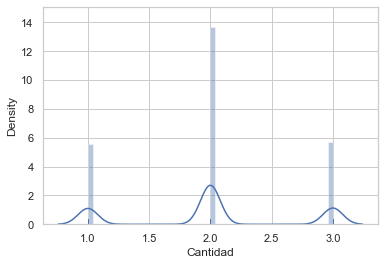

In [66]:
sns.distplot(df_venta[(df_venta['Calidad_Precio'] == 'Sin errores') & (df_venta['Calidad_Cantidad'] == 'Sin errores')].Cantidad, hist=True, kde=True, rug=True)
plt.show()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


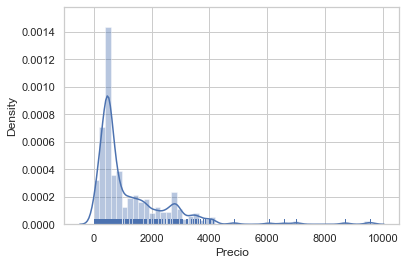

In [67]:
sns.distplot(df_venta[(df_venta['Calidad_Precio'] == 'Sin errores') & (df_venta['Calidad_Cantidad'] == 'Sin errores')].Precio, hist=True, kde=True, rug=True)
plt.show()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


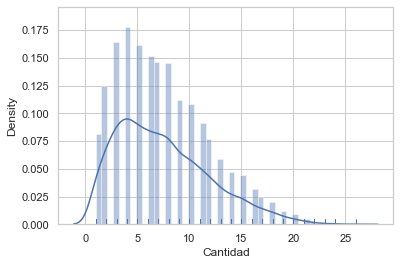

In [68]:
sns.distplot(df_compra[(df_compra['Calidad_Precio'] == 'Sin errores') & (df_compra['Calidad_Cantidad'] == 'Sin errores')].Cantidad, hist=True, kde=True, rug=True)
plt.show()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


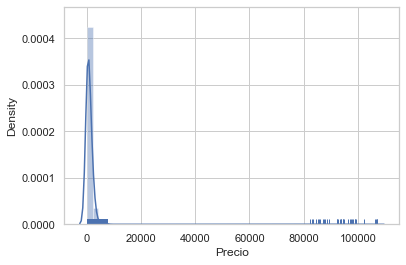

In [69]:
sns.distplot(df_compra[(df_compra['Calidad_Precio'] == 'Sin errores') & (df_compra['Calidad_Cantidad'] == 'Sin errores')].Precio, hist=True, kde=True, rug=True)
plt.show()

In [70]:
df_venta.to_csv('Datasets/Venta_Procesado.csv', index=False)
df_compra.to_csv('Datasets/Compra_Procesado.csv', index=False)
df_gasto.to_csv('Datasets/Gasto_Procesado.csv', index=False)

3- Es necesario contar con una tabla de localidades del país con el fin de evaluar la apertura de una nueva sucursal y mejorar nuestros datos. A partir de los datos en las diferentes tablas deberás normalizar la información. Para esto, se provee un maestro de localidades y una función de comparación de palabras basada en el algoritmo de Levenshtein.


In [71]:
df_cliente = pd.read_csv('Datasets/Clientes.csv', sep=";")

In [73]:
df_proveedor = pd.read_csv('Datasets/Proveedores.csv', sep=",", encoding="ansi")

In [74]:
df_sucursal = pd.read_csv('Datasets/Sucursales.csv', sep=";", encoding="ansi")

In [75]:
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Esta función calcula la distancia de Levenshtein entre dos cadenas de caracteres
        Si ratio_calc = True, la función computa la distancia de Levenshtein o similaridad entre dos cadenas de caracteres
        Para todas las 'i' y 'j', distance[i,j] contendrá la distancia de Levenshtein entre los primeros 'i' caracteres de 's'
        y el primer 'j' de 't'
        Fuente: https://www.datacamp.com/community/tutorials/fuzzy-string-python
    """
    import numpy as np
    # Initialize matrix of zeros
    s = str(s)
    t = str(t)
    rows = len(s)+1
    cols = len(t)+1
    if (rows == 1 or cols == 1):
        return 0
    col = 0
    row = 0
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

In [76]:
def normalizacion_geografica(df_normalizar, campo_localidad, campo_provincia):
    import pandas as pd
    from IPython.display import clear_output
    
    df_localidad = pd.read_csv('Datasets/Localidades.csv', sep=",")
    
    lista_localidad_original = []
    lista_provincia_original = []
    lista_localidad = []
    lista_localidad_ind = []
    lista_provincia = []
    lista_provincia_ind = []
    lista_localidad_id = []

    total = df_normalizar.shape[0]
    j = 0

    while ((j < total)):
        localidad_ind = 0
        localidad = ''
        provincia_ind = 0
        provincia = ''
        ind = 0
        id_localidad = 0
        l = 0
        for prov in df_localidad.provincia_nombre.unique():
            ind = levenshtein_ratio_and_distance(str(df_normalizar.iloc[j][campo_provincia]).lower(),str(prov).lower(), ratio_calc = True)
            if (ind > provincia_ind):
                provincia_ind = ind
                provincia = str(prov)

        df_loc = df_localidad[df_localidad['provincia_nombre'] == provincia][['id','localidad_censal_nombre','municipio_nombre','nombre']]
        total_l = df_loc.id.count()
        l = 0
        encontrado = False
        while ((l < total_l) & (not encontrado)):
            ind = levenshtein_ratio_and_distance(str(df_normalizar.iloc[j][campo_localidad]).lower(),str(df_loc.iloc[l]['localidad_censal_nombre']).lower(), ratio_calc = True)
            if (ind > localidad_ind):
                localidad_ind = ind
                localidad = str(df_loc.iloc[l]['localidad_censal_nombre'])
                id_localidad = df_loc.iloc[l]['id']

            ind = levenshtein_ratio_and_distance(str(df_normalizar.iloc[j][campo_localidad]).lower(),str(df_loc.iloc[l]['municipio_nombre']).lower(), ratio_calc = True)
            if (ind > localidad_ind):
                localidad_ind = ind
                localidad = str(df_loc.iloc[l]['municipio_nombre'])
                id_localidad = df_loc.iloc[l]['id']

            ind = levenshtein_ratio_and_distance(str(df_normalizar.iloc[j][campo_localidad]).lower(),str(df_loc.iloc[l]['nombre']).lower(), ratio_calc = True)
            if (ind > localidad_ind):
                localidad_ind = ind
                localidad = str(df_loc.iloc[l]['nombre'])
                id_localidad = df_loc.iloc[l]['id']

            if (localidad_ind == 1):
                encontrado = True

            l = l + 1
        del(df_loc)

        lista_localidad_original.append(df_normalizar.iloc[j][campo_localidad])
        lista_provincia_original.append(df_normalizar.iloc[j][campo_provincia])
        lista_localidad.append(localidad)
        lista_localidad_ind.append(localidad_ind)
        lista_provincia.append(provincia)
        lista_provincia_ind.append(provincia_ind)
        lista_localidad_id.append(id_localidad)
        j = j + 1

        clear_output(wait=True)
        print('Completado: ' + str(round(j / total * 100, 2)) + '%')

    lst = list(zip(lista_localidad_original, lista_provincia_original, lista_localidad, lista_localidad_ind, lista_provincia, lista_provincia_ind, lista_localidad_id))
    df_normalizar = pd.DataFrame(lst , columns = [campo_localidad,campo_provincia,'Localidad_Normalizada','Localidad_Ind','Provincia_Normalizada','Provincia_Ind', 'id'])
    
    return df_normalizar

In [77]:
df_normalizar = df_cliente[['Localidad', 'Provincia']]
df_normalizar = df_normalizar.drop_duplicates()

In [79]:
df_normalizar = normalizacion_geografica(df_normalizar, 'Localidad', 'Provincia')

Completado: 100.0%


In [80]:
df_cliente = pd.merge(df_cliente, df_normalizar, on=['Localidad', 'Provincia'], how='left')

In [84]:
df_normalizar = df_proveedor[['State','departamen']]
df_normalizar = df_normalizar.drop_duplicates()

In [87]:
df_normalizar = normalizacion_geografica(df_normalizar, 'departamen', 'State')

Completado: 100.0%


In [90]:
df_proveedor = pd.merge(df_proveedor, df_normalizar, on=['departamen', 'State'], how='left')

In [91]:
df_normalizar = df_sucursal[['Localidad', 'Provincia']]
df_normalizar = df_normalizar.drop_duplicates()

In [92]:
df_normalizar = normalizacion_geografica(df_normalizar, 'Localidad', 'Provincia')

Completado: 100.0%


In [93]:
df_sucursal = pd.merge(df_sucursal, df_normalizar, on=['Localidad', 'Provincia'], how='left')

In [94]:
df_cliente.to_csv('Datasets/Cliente_Procesado.csv', index=False)
df_proveedor.to_csv('Datasets/Proveedor_Procesado.csv', index=False)
df_sucursal.to_csv('Datasets/Sucursal_Procesado.csv', index=False)